In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [2]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [3]:
ordinal = pd.read_csv('OrdinalDropIF50.csv')
ordinal.shape

(2579, 81)

In [4]:
ordinal.head(2)

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,0,3,3,3,3,3,3,8,4,1,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,3.0,5.0,6.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,9.0,4.0,6.0,5.0,4.0,856,126000,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,68.516053,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,1,4,3,4,3,3,4,8,0,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,0.0,4.0,3.0,1049,139500,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,42.000000,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0


In [5]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2579, 80)

In [6]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

rf = RandomForestRegressor(bootstrap=True) 

RF = evaluate_model(rf, X, y)[['test_score']]
RF = RF.rename(columns={'test_score':'Random Forest'})
RF

,Random Forest
0,0.892371
1,0.912122
2,0.862510
3,0.879026
4,0.916694
5,0.901888
6,0.907817
7,0.893744
8,0.853985
9,0.912814


In [7]:
def get_models_2():
    models = dict()
    models['gradient boost'] = GradientBoostingRegressor()
    models['Xtreme GB'] = XGBRegressor()
    models['CatBoost'] = CatBoostRegressor(verbose=False)
    return models

In [8]:
models2 = get_models_2()

In [9]:
#Create List of Dictionaries to evalute models

dfs2 = list()

for name, model in models2.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs2.append(df)

In [10]:
#dfs2

In [11]:
gb = dfs2[0][['test_score']]
gb = gb.rename(columns = {'test_score':'Gradient Boost'})
gb

,Gradient Boost
0,0.921521
1,0.928922
2,0.858175
3,0.894047
4,0.935962
5,0.916849
6,0.924489
7,0.907716
8,0.858316
9,0.932777


In [12]:
xgb = dfs2[1][['test_score']]
xgb = xgb.rename(columns = {'test_score':'XGB'})
xgb

,XGB
0,0.912539
1,0.916434
2,0.858468
3,0.889357
4,0.916625
5,0.890450
6,0.904008
7,0.894156
8,0.851725
9,0.922614


In [13]:
cb = dfs2[2][['test_score']]
cb = cb.rename(columns = {'test_score':'CatBoost'})
cb

,CatBoost
0,0.935556
1,0.940566
2,0.897241
3,0.915321
4,0.948674
5,0.927965
6,0.934617
7,0.922736
8,0.903601
9,0.947940


In [14]:
combo = pd.concat([RF, gb, xgb, cb], axis=1)
combo

,Random Forest,Gradient Boost,XGB,CatBoost
0,0.892371,0.921521,0.912539,0.935556
1,0.912122,0.928922,0.916434,0.940566
2,0.862510,0.858175,0.858468,0.897241
3,0.879026,0.894047,0.889357,0.915321
4,0.916694,0.935962,0.916625,0.948674
5,0.901888,0.916849,0.890450,0.927965
6,0.907817,0.924489,0.904008,0.934617
7,0.893744,0.907716,0.894156,0.922736
8,0.853985,0.858316,0.851725,0.903601
9,0.912814,0.932777,0.922614,0.947940


In [15]:
g4, g7, g9 = sns.color_palette("muted", 3)

In [16]:
sns.color_palette("muted", 3)

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803)]

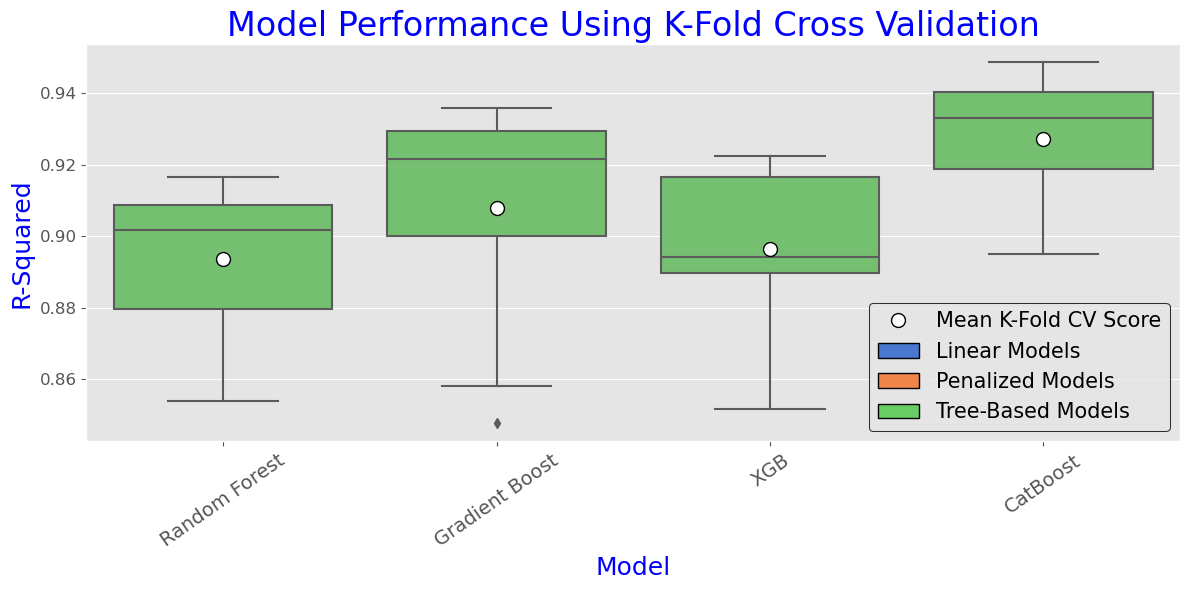

In [17]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0],[0], marker='o', markersize=10, color='w', lw=0, markeredgecolor='black', label='Mean K-Fold CV Score'),
                   Patch(facecolor=g4, edgecolor='black', label='Linear Models'),
                   Patch(facecolor=g7, edgecolor='black', label='Penalized Models'),
                   Patch(facecolor=g9, edgecolor='black', label='Tree-Based Models')]

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(12,6))

my_pal = {"SLR (Area)":g4, "SLR (Quality)":g4, "MLR (Area & Quality)":g4,
         "Ridge":g7, "Lasso":g7, "ElasticNet":g7,
         "Random Forest":g9, "Gradient Boost": g9, "XGB":g9, "CatBoost":g9}

ax = sns.boxplot(data=combo, showmeans=True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, palette=my_pal)

leg = ax.legend(handles=legend_elements, loc='lower right', fontsize=15)
leg.get_frame().set_linewidth(0.75)
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('R-Squared', fontsize=18, color='blue')
plt.xlabel('Model', fontsize=18, color='blue')

plt.title('Model Performance Using K-Fold Cross Validation', fontsize=24, color='blue')

#colors = [g4, g4, g4, g7, g7, g7, g9, g9, g9, g9]
#for xtick, color in zip(ax.get_xticklabels(), colors):
#    xtick.set_color(color)

plt.tight_layout();

In [18]:
combo.describe()

,Random Forest,Gradient Boost,XGB,CatBoost
count,15.000000,15.000000,15.000000,15.000000
mean,0.893654,0.908027,0.896581,0.927163
std,0.019915,0.029887,0.023110,0.017524
min,0.853985,0.847774,0.851725,0.895060
25%,0.879659,0.900061,0.889884,0.918933
50%,0.901888,0.921521,0.894156,0.933048
75%,0.908804,0.929577,0.916530,0.940354
max,0.916694,0.935962,0.922614,0.948674


In [19]:
combo.describe()

,Random Forest,Gradient Boost,XGB,CatBoost
count,15.000000,15.000000,15.000000,15.000000
mean,0.893654,0.908027,0.896581,0.927163
std,0.019915,0.029887,0.023110,0.017524
min,0.853985,0.847774,0.851725,0.895060
25%,0.879659,0.900061,0.889884,0.918933
50%,0.901888,0.921521,0.894156,0.933048
75%,0.908804,0.929577,0.916530,0.940354
max,0.916694,0.935962,0.922614,0.948674
